# 자동차 연비 예측하기: 회귀

In [30]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
import numpy as np

In [31]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\82103\\.keras\\datasets\\auto-mpg.data'

In [32]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t', 
                    # ?는 결집치로, \t는 주석으로 생각 하지마라
                    # 스페이스 뒤에는 스킵
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy() # 원본은 아껴놓기
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [33]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [34]:
dataset.dropna().shape
# 지우면 데이터있는 다른 컬럼거도 지워짐..

(392, 8)

In [35]:
dataset.fillna(0)
# 0으로 채우는게 나은지

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [36]:
dataset.dropna(inplace=True)

In [37]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [39]:
dataset.Origin.unique()

array([1, 3, 2], dtype=int64)

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

In [42]:
train_dataset = dataset.sample(frac=0.8,random_state=0)

In [43]:
train_dataset.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0


In [80]:
train_dataset.index

Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)

In [81]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


In [44]:
test_dataset = dataset.drop(train_dataset.index)

In [45]:
test_dataset.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0


In [47]:
train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]].corr()

,MPG,Cylinders,Displacement,Weight
MPG,1.000000,-0.770246,-0.800383,-0.819802
Cylinders,-0.770246,1.000000,0.946806,0.893869
Displacement,-0.800383,0.946806,1.000000,0.929876
Weight,-0.819802,0.893869,0.929876,1.000000


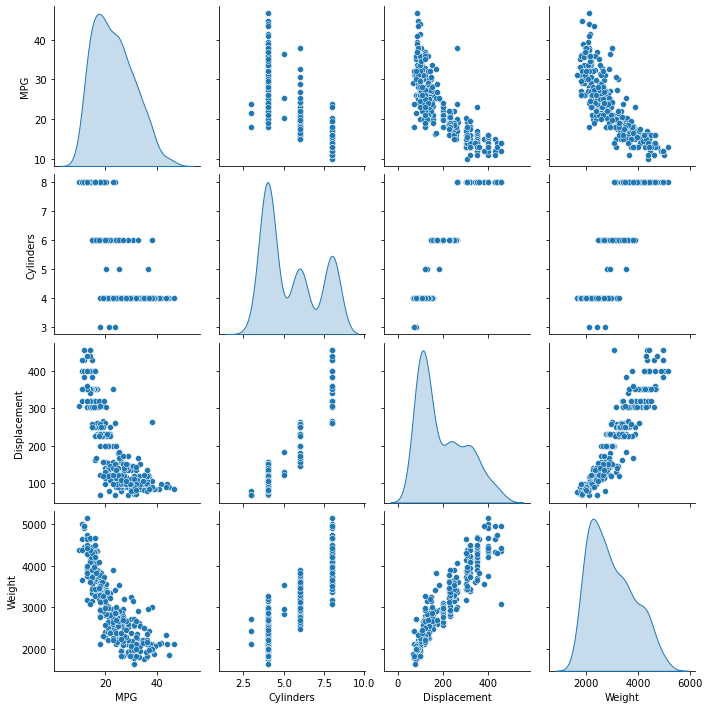

In [46]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [59]:
train_stats = train_dataset.describe()
train_stats

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [50]:
train_stats.pop("MPG")

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [70]:
train_stats = train_stats.transpose() # 데이터베이스 회전
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [54]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

## 데이터 표준화

In [72]:
def norm(x):
      return (x - train_stats['mean']) / train_stats['std']
    
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [62]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
          ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) # 평가지표
                        # 평균 절대 오차, 평균 제곱 오차?
    return model

In [73]:
model = build_model()

In [74]:
EPOCHS = 1000
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 2s 79ms/step - loss: 582.7618 - mae: 22.8602 - mse: 582.7618 - val_loss: 579.6983 - val_mae: 22.7670 - val_mse: 579.6983
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 540.8452 - mae: 21.9405 - mse: 540.8452 - val_loss: 536.9182 - val_mae: 21.8098 - val_mse: 536.9182
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 500.1305 - mae: 21.0041 - mse: 500.1305 - val_loss: 489.9650 - val_mae: 20.7219 - val_mse: 489.9650
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 454.7994 - mae: 19.9364 - mse: 454.7994 - val_loss: 437.8898 - val_mae: 19.4664 - val_mse: 437.8898
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 405.3715 - mae: 18.6989 - mse: 405.3715 - val_loss: 382.3961 - val_mae: 18.0388 - val_mse: 382.3961
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 352.0201 - mae: 17.2908 - mse: 352.0201 - val_loss: 323.0297 - va

8/8 [==============================] - 0s 7ms/step - loss: 6.9865 - mae: 1.9248 - mse: 6.9865 - val_loss: 8.9996 - val_mae: 2.3274 - val_mse: 8.9996
Epoch 51/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.9981 - mae: 1.8837 - mse: 6.9981 - val_loss: 9.1221 - val_mae: 2.2068 - val_mse: 9.1221
Epoch 52/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.9082 - mae: 1.8716 - mse: 6.9082 - val_loss: 9.0101 - val_mae: 2.1967 - val_mse: 9.0101
Epoch 53/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.8014 - mae: 1.8782 - mse: 6.8014 - val_loss: 9.4079 - val_mae: 2.2174 - val_mse: 9.4079
Epoch 54/1000
8/8 [==============================] - 0s 5ms/step - loss: 6.9743 - mae: 1.8823 - mse: 6.9743 - val_loss: 8.8590 - val_mae: 2.2388 - val_mse: 8.8590
Epoch 55/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.7875 - mae: 1.8579 - mse: 6.7875 - val_loss: 9.3011 - val_mae: 2.4101 - val_mse: 9.3011
Epoch 56/1000
8/8 [================

8/8 [==============================] - 0s 5ms/step - loss: 5.9711 - mae: 1.7109 - mse: 5.9711 - val_loss: 8.4320 - val_mae: 2.1894 - val_mse: 8.4320
Epoch 101/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.9730 - mae: 1.7067 - mse: 5.9730 - val_loss: 8.5116 - val_mae: 2.1907 - val_mse: 8.5116
Epoch 102/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.8615 - mae: 1.6995 - mse: 5.8615 - val_loss: 8.4013 - val_mae: 2.2025 - val_mse: 8.4013
Epoch 103/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.8595 - mae: 1.7037 - mse: 5.8595 - val_loss: 8.5745 - val_mae: 2.1411 - val_mse: 8.5745
Epoch 104/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.8705 - mae: 1.6929 - mse: 5.8705 - val_loss: 8.4833 - val_mae: 2.1493 - val_mse: 8.4833
Epoch 105/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.0335 - mae: 1.7226 - mse: 6.0335 - val_loss: 8.3889 - val_mae: 2.1812 - val_mse: 8.3889
Epoch 106/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 5.4807 - mae: 1.6209 - mse: 5.4807 - val_loss: 8.3755 - val_mae: 2.1326 - val_mse: 8.3755
Epoch 151/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.4063 - mae: 1.6062 - mse: 5.4063 - val_loss: 8.5830 - val_mae: 2.1844 - val_mse: 8.5830
Epoch 152/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.4781 - mae: 1.6219 - mse: 5.4781 - val_loss: 8.3336 - val_mae: 2.1353 - val_mse: 8.3336
Epoch 153/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.4391 - mae: 1.6194 - mse: 5.4391 - val_loss: 8.3466 - val_mae: 2.1802 - val_mse: 8.3466
Epoch 154/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4826 - mae: 1.6250 - mse: 5.4826 - val_loss: 8.5075 - val_mae: 2.1708 - val_mse: 8.5075
Epoch 155/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.5900 - mae: 1.6321 - mse: 5.5900 - val_loss: 8.3697 - val_mae: 2.1291 - val_mse: 8.3697
Epoch 156/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 5.2829 - mae: 1.5893 - mse: 5.2829 - val_loss: 8.4214 - val_mae: 2.1472 - val_mse: 8.4214
Epoch 201/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.2490 - mae: 1.5636 - mse: 5.2490 - val_loss: 8.3616 - val_mae: 2.1831 - val_mse: 8.3616
Epoch 202/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.1292 - mae: 1.5380 - mse: 5.1292 - val_loss: 8.4892 - val_mae: 2.2080 - val_mse: 8.4892
Epoch 203/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.1602 - mae: 1.5673 - mse: 5.1602 - val_loss: 8.4790 - val_mae: 2.1590 - val_mse: 8.4790
Epoch 204/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.1125 - mae: 1.5524 - mse: 5.1125 - val_loss: 8.4343 - val_mae: 2.1717 - val_mse: 8.4343
Epoch 205/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4123 - mae: 1.6015 - mse: 5.4123 - val_loss: 8.4880 - val_mae: 2.1914 - val_mse: 8.4880
Epoch 206/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 4.9469 - mae: 1.5151 - mse: 4.9469 - val_loss: 8.5333 - val_mae: 2.1845 - val_mse: 8.5333
Epoch 251/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.8033 - mae: 1.4924 - mse: 4.8033 - val_loss: 8.7725 - val_mae: 2.2517 - val_mse: 8.7725
Epoch 252/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.7967 - mae: 1.5154 - mse: 4.7967 - val_loss: 8.8061 - val_mae: 2.1946 - val_mse: 8.8061
Epoch 253/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.8548 - mae: 1.5023 - mse: 4.8548 - val_loss: 8.7605 - val_mae: 2.1990 - val_mse: 8.7605
Epoch 254/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.8484 - mae: 1.5041 - mse: 4.8484 - val_loss: 8.7386 - val_mae: 2.2073 - val_mse: 8.7386
Epoch 255/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.9724 - mae: 1.5377 - mse: 4.9724 - val_loss: 8.6584 - val_mae: 2.2143 - val_mse: 8.6584
Epoch 256/1000
8/8 [===========

8/8 [==============================] - 0s 7ms/step - loss: 4.6486 - mae: 1.4637 - mse: 4.6486 - val_loss: 8.6242 - val_mae: 2.2353 - val_mse: 8.6242
Epoch 301/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.5530 - mae: 1.4099 - mse: 4.5530 - val_loss: 8.6092 - val_mae: 2.1896 - val_mse: 8.6092
Epoch 302/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.6702 - mae: 1.4512 - mse: 4.6702 - val_loss: 8.3941 - val_mae: 2.1879 - val_mse: 8.3941
Epoch 303/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.4747 - mae: 1.4529 - mse: 4.4747 - val_loss: 8.7334 - val_mae: 2.1708 - val_mse: 8.7334
Epoch 304/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.6228 - mae: 1.4472 - mse: 4.6228 - val_loss: 8.7527 - val_mae: 2.1646 - val_mse: 8.7527
Epoch 305/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.4923 - mae: 1.4372 - mse: 4.4923 - val_loss: 8.8220 - val_mae: 2.1780 - val_mse: 8.8220
Epoch 306/1000
8/8 [==========

8/8 [==============================] - 0s 7ms/step - loss: 4.4766 - mae: 1.4489 - mse: 4.4766 - val_loss: 8.8357 - val_mae: 2.2861 - val_mse: 8.8357
Epoch 351/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.3745 - mae: 1.3954 - mse: 4.3745 - val_loss: 8.5906 - val_mae: 2.2271 - val_mse: 8.5906
Epoch 352/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.3081 - mae: 1.3867 - mse: 4.3081 - val_loss: 8.9507 - val_mae: 2.2686 - val_mse: 8.9507
Epoch 353/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.2650 - mae: 1.3728 - mse: 4.2650 - val_loss: 8.7305 - val_mae: 2.2122 - val_mse: 8.7305
Epoch 354/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.4814 - mae: 1.4678 - mse: 4.4814 - val_loss: 8.8005 - val_mae: 2.2343 - val_mse: 8.8005
Epoch 355/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.4386 - mae: 1.4215 - mse: 4.4386 - val_loss: 8.8223 - val_mae: 2.2248 - val_mse: 8.8223
Epoch 356/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 4.1172 - mae: 1.3460 - mse: 4.1172 - val_loss: 8.8910 - val_mae: 2.2637 - val_mse: 8.8910
Epoch 401/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.0134 - mae: 1.3401 - mse: 4.0134 - val_loss: 8.9231 - val_mae: 2.2525 - val_mse: 8.9231
Epoch 402/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.0263 - mae: 1.3326 - mse: 4.0263 - val_loss: 9.4004 - val_mae: 2.3770 - val_mse: 9.4004
Epoch 403/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.4195 - mae: 1.4020 - mse: 4.4195 - val_loss: 8.7865 - val_mae: 2.2168 - val_mse: 8.7865
Epoch 404/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.0827 - mae: 1.3487 - mse: 4.0827 - val_loss: 8.9950 - val_mae: 2.2580 - val_mse: 8.9950
Epoch 405/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.0760 - mae: 1.3644 - mse: 4.0760 - val_loss: 9.0232 - val_mae: 2.2805 - val_mse: 9.0232
Epoch 406/1000
8/8 [===========

8/8 [==============================] - 0s 8ms/step - loss: 3.9975 - mae: 1.3031 - mse: 3.9975 - val_loss: 8.9230 - val_mae: 2.2688 - val_mse: 8.9230
Epoch 451/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9186 - mae: 1.3007 - mse: 3.9186 - val_loss: 9.1109 - val_mae: 2.3013 - val_mse: 9.1109
Epoch 452/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9379 - mae: 1.3159 - mse: 3.9379 - val_loss: 8.8950 - val_mae: 2.2978 - val_mse: 8.8950
Epoch 453/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.8039 - mae: 1.2889 - mse: 3.8039 - val_loss: 8.7785 - val_mae: 2.2675 - val_mse: 8.7785
Epoch 454/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.8715 - mae: 1.3328 - mse: 3.8715 - val_loss: 9.1495 - val_mae: 2.3061 - val_mse: 9.1495
Epoch 455/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.8261 - mae: 1.3122 - mse: 3.8261 - val_loss: 9.0073 - val_mae: 2.2744 - val_mse: 9.0073
Epoch 456/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 3.6380 - mae: 1.2745 - mse: 3.6380 - val_loss: 8.7971 - val_mae: 2.2127 - val_mse: 8.7971
Epoch 501/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.6387 - mae: 1.2355 - mse: 3.6387 - val_loss: 9.0809 - val_mae: 2.2606 - val_mse: 9.0809
Epoch 502/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.6837 - mae: 1.2886 - mse: 3.6837 - val_loss: 8.7754 - val_mae: 2.2617 - val_mse: 8.7754
Epoch 503/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.6613 - mae: 1.2584 - mse: 3.6613 - val_loss: 8.7791 - val_mae: 2.2595 - val_mse: 8.7791
Epoch 504/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.6904 - mae: 1.2948 - mse: 3.6904 - val_loss: 9.0817 - val_mae: 2.3195 - val_mse: 9.0817
Epoch 505/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.5535 - mae: 1.2387 - mse: 3.5535 - val_loss: 8.8248 - val_mae: 2.2448 - val_mse: 8.8248
Epoch 506/1000
8/8 [===========

8/8 [==============================] - 0s 8ms/step - loss: 3.5211 - mae: 1.2278 - mse: 3.5211 - val_loss: 8.8233 - val_mae: 2.2149 - val_mse: 8.8233
Epoch 551/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.5930 - mae: 1.2324 - mse: 3.5930 - val_loss: 8.9850 - val_mae: 2.3148 - val_mse: 8.9850
Epoch 552/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4709 - mae: 1.2067 - mse: 3.4709 - val_loss: 8.3977 - val_mae: 2.2436 - val_mse: 8.3977
Epoch 553/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5783 - mae: 1.2310 - mse: 3.5783 - val_loss: 8.5688 - val_mae: 2.2333 - val_mse: 8.5688
Epoch 554/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.2623 - mae: 1.1640 - mse: 3.2623 - val_loss: 8.9205 - val_mae: 2.2695 - val_mse: 8.9205
Epoch 555/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.6063 - mae: 1.2762 - mse: 3.6063 - val_loss: 8.7234 - val_mae: 2.2461 - val_mse: 8.7234
Epoch 556/1000
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 3.2121 - mae: 1.1724 - mse: 3.2121 - val_loss: 9.2210 - val_mae: 2.3599 - val_mse: 9.2210
Epoch 601/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.3600 - mae: 1.2064 - mse: 3.3600 - val_loss: 8.7177 - val_mae: 2.2645 - val_mse: 8.7177
Epoch 602/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.2790 - mae: 1.2063 - mse: 3.2790 - val_loss: 8.6614 - val_mae: 2.2820 - val_mse: 8.6614
Epoch 603/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.3488 - mae: 1.1693 - mse: 3.3488 - val_loss: 8.8822 - val_mae: 2.2755 - val_mse: 8.8822
Epoch 604/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.3929 - mae: 1.1994 - mse: 3.3929 - val_loss: 8.5184 - val_mae: 2.2526 - val_mse: 8.5184
Epoch 605/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2954 - mae: 1.2015 - mse: 3.2954 - val_loss: 8.4197 - val_mae: 2.2232 - val_mse: 8.4197
Epoch 606/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 3.1814 - mae: 1.1856 - mse: 3.1814 - val_loss: 9.0440 - val_mae: 2.3609 - val_mse: 9.0440
Epoch 651/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.1986 - mae: 1.1439 - mse: 3.1986 - val_loss: 8.5822 - val_mae: 2.2582 - val_mse: 8.5822
Epoch 652/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.0047 - mae: 1.1440 - mse: 3.0047 - val_loss: 8.6612 - val_mae: 2.2862 - val_mse: 8.6612
Epoch 653/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.0145 - mae: 1.1376 - mse: 3.0145 - val_loss: 8.5348 - val_mae: 2.2383 - val_mse: 8.5348
Epoch 654/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.1071 - mae: 1.1626 - mse: 3.1071 - val_loss: 8.6818 - val_mae: 2.2479 - val_mse: 8.6818
Epoch 655/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.9903 - mae: 1.1192 - mse: 2.9903 - val_loss: 8.8882 - val_mae: 2.2899 - val_mse: 8.8882
Epoch 656/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 2.8694 - mae: 1.1015 - mse: 2.8694 - val_loss: 8.6411 - val_mae: 2.2511 - val_mse: 8.6411
Epoch 701/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.9833 - mae: 1.1493 - mse: 2.9833 - val_loss: 8.3295 - val_mae: 2.2681 - val_mse: 8.3295
Epoch 702/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2458 - mae: 1.1411 - mse: 3.2458 - val_loss: 8.7376 - val_mae: 2.2871 - val_mse: 8.7376
Epoch 703/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.9992 - mae: 1.1430 - mse: 2.9992 - val_loss: 8.8750 - val_mae: 2.3472 - val_mse: 8.8750
Epoch 704/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.0257 - mae: 1.1374 - mse: 3.0257 - val_loss: 8.3683 - val_mae: 2.2380 - val_mse: 8.3683
Epoch 705/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.9570 - mae: 1.1074 - mse: 2.9570 - val_loss: 8.8296 - val_mae: 2.3519 - val_mse: 8.8296
Epoch 706/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 2.8263 - mae: 1.0851 - mse: 2.8263 - val_loss: 9.1292 - val_mae: 2.3861 - val_mse: 9.1292
Epoch 751/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.8239 - mae: 1.1235 - mse: 2.8239 - val_loss: 8.3501 - val_mae: 2.2142 - val_mse: 8.3501
Epoch 752/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.8388 - mae: 1.0888 - mse: 2.8388 - val_loss: 8.6058 - val_mae: 2.3099 - val_mse: 8.6058
Epoch 753/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.0768 - mae: 1.0985 - mse: 3.0768 - val_loss: 8.3694 - val_mae: 2.2637 - val_mse: 8.3694
Epoch 754/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.6608 - mae: 1.0448 - mse: 2.6608 - val_loss: 8.4153 - val_mae: 2.2520 - val_mse: 8.4153
Epoch 755/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.8255 - mae: 1.0835 - mse: 2.8255 - val_loss: 8.4208 - val_mae: 2.2376 - val_mse: 8.4208
Epoch 756/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 2.7229 - mae: 1.1108 - mse: 2.7229 - val_loss: 8.5113 - val_mae: 2.2880 - val_mse: 8.5113
Epoch 801/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.7770 - mae: 1.0511 - mse: 2.7770 - val_loss: 8.7127 - val_mae: 2.2863 - val_mse: 8.7127
Epoch 802/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.6317 - mae: 1.0117 - mse: 2.6317 - val_loss: 9.2257 - val_mae: 2.2734 - val_mse: 9.2257
Epoch 803/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.7368 - mae: 1.0738 - mse: 2.7368 - val_loss: 8.9542 - val_mae: 2.2607 - val_mse: 8.9542
Epoch 804/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.6408 - mae: 1.0552 - mse: 2.6408 - val_loss: 8.2627 - val_mae: 2.2782 - val_mse: 8.2627
Epoch 805/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.6916 - mae: 1.0636 - mse: 2.6916 - val_loss: 8.4029 - val_mae: 2.2642 - val_mse: 8.4029
Epoch 806/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 2.6007 - mae: 1.0300 - mse: 2.6007 - val_loss: 8.5386 - val_mae: 2.2840 - val_mse: 8.5386
Epoch 851/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.5578 - mae: 1.0079 - mse: 2.5578 - val_loss: 8.7002 - val_mae: 2.2563 - val_mse: 8.7002
Epoch 852/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.8555 - mae: 1.0910 - mse: 2.8555 - val_loss: 8.4513 - val_mae: 2.2609 - val_mse: 8.4513
Epoch 853/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.4118 - mae: 1.0342 - mse: 2.4118 - val_loss: 8.2998 - val_mae: 2.2316 - val_mse: 8.2998
Epoch 854/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.5646 - mae: 1.0434 - mse: 2.5646 - val_loss: 8.8043 - val_mae: 2.2840 - val_mse: 8.8043
Epoch 855/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.6473 - mae: 1.0664 - mse: 2.6473 - val_loss: 8.9232 - val_mae: 2.3747 - val_mse: 8.9232
Epoch 856/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 2.3614 - mae: 0.9873 - mse: 2.3614 - val_loss: 8.9461 - val_mae: 2.3551 - val_mse: 8.9461
Epoch 901/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.3019 - mae: 0.9821 - mse: 2.3019 - val_loss: 8.7884 - val_mae: 2.3545 - val_mse: 8.7884
Epoch 902/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.4199 - mae: 0.9857 - mse: 2.4199 - val_loss: 8.4316 - val_mae: 2.2547 - val_mse: 8.4316
Epoch 903/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.3965 - mae: 0.9843 - mse: 2.3965 - val_loss: 8.8350 - val_mae: 2.3034 - val_mse: 8.8350
Epoch 904/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.5422 - mae: 1.0660 - mse: 2.5422 - val_loss: 8.7070 - val_mae: 2.3429 - val_mse: 8.7070
Epoch 905/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.5149 - mae: 0.9852 - mse: 2.5149 - val_loss: 8.8194 - val_mae: 2.3119 - val_mse: 8.8194
Epoch 906/1000
8/8 [===========

8/8 [==============================] - 0s 7ms/step - loss: 2.3415 - mae: 0.9957 - mse: 2.3415 - val_loss: 8.7906 - val_mae: 2.2906 - val_mse: 8.7906
Epoch 951/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.3342 - mae: 0.9632 - mse: 2.3342 - val_loss: 8.5463 - val_mae: 2.2592 - val_mse: 8.5463
Epoch 952/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.3695 - mae: 0.9973 - mse: 2.3695 - val_loss: 8.8233 - val_mae: 2.2553 - val_mse: 8.8233
Epoch 953/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.2430 - mae: 0.9451 - mse: 2.2430 - val_loss: 8.9637 - val_mae: 2.2502 - val_mse: 8.9637
Epoch 954/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.5101 - mae: 1.0490 - mse: 2.5101 - val_loss: 8.8522 - val_mae: 2.3141 - val_mse: 8.8522
Epoch 955/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.4240 - mae: 0.9877 - mse: 2.4240 - val_loss: 8.7267 - val_mae: 2.3020 - val_mse: 8.7267
Epoch 956/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 2.1301 - mae: 0.9301 - mse: 2.1301 - val_loss: 8.5996 - val_mae: 2.2726 - val_mse: 8.5996


In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.259648,0.985321,2.259648,8.625438,2.306549,8.625438,995
996,2.171485,0.945054,2.171485,9.115430,2.399690,9.115430,996
997,2.284363,0.978744,2.284363,8.552653,2.309908,8.552653,997
998,2.336917,0.972311,2.336917,9.104786,2.431196,9.104786,998
999,2.130119,0.930057,2.130119,8.599574,2.272624,8.599574,999


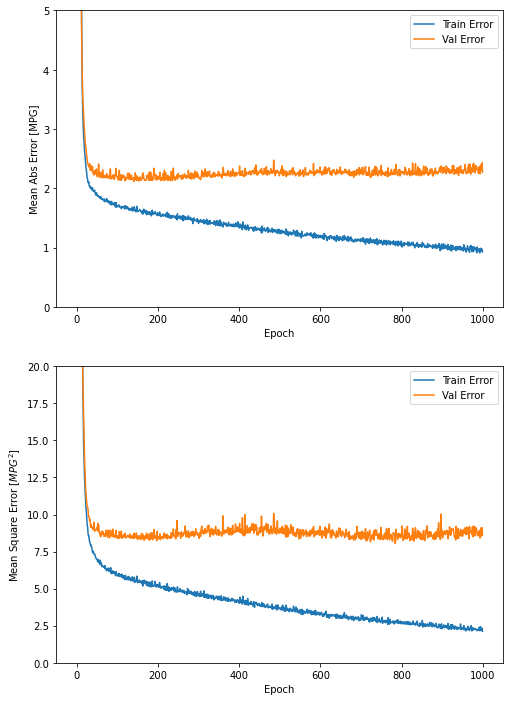

In [76]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

Epoch 1/1000
8/8 [==============================] - 1s 91ms/step - loss: 547.3908 - mae: 22.0331 - mse: 547.3908 - val_loss: 531.2787 - val_mae: 21.5823 - val_mse: 531.2787
Epoch 2/1000
8/8 [==============================] - 0s 14ms/step - loss: 490.3599 - mae: 20.6789 - mse: 490.3599 - val_loss: 473.3158 - val_mae: 20.1648 - val_mse: 473.3158
Epoch 3/1000
8/8 [==============================] - 0s 17ms/step - loss: 436.1309 - mae: 19.3015 - mse: 436.1309 - val_loss: 413.5942 - val_mae: 18.6145 - val_mse: 413.5942
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 378.7837 - mae: 17.8055 - mse: 378.7837 - val_loss: 351.1245 - val_mae: 16.8645 - val_mse: 351.1245
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 320.6781 - mae: 16.1359 - mse: 320.6781 - val_loss: 288.6857 - val_mae: 15.0900 - val_mse: 288.6857
Epoch 6/1000
8/8 [==============================] - 0s 11ms/step - loss: 261.2067 - mae: 14.4519 - mse: 261.2067 - val_loss: 225.6237 - v

8/8 [==============================] - 0s 9ms/step - loss: 6.8671 - mae: 1.8919 - mse: 6.8671 - val_loss: 9.2390 - val_mae: 2.2673 - val_mse: 9.2390
Epoch 51/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.9947 - mae: 1.8642 - mse: 6.9947 - val_loss: 9.2568 - val_mae: 2.2981 - val_mse: 9.2568
Epoch 52/1000
8/8 [==============================] - 0s 17ms/step - loss: 6.8497 - mae: 1.8584 - mse: 6.8497 - val_loss: 9.1778 - val_mae: 2.2673 - val_mse: 9.1778
Epoch 53/1000
8/8 [==============================] - 0s 30ms/step - loss: 6.8236 - mae: 1.8612 - mse: 6.8236 - val_loss: 9.3299 - val_mae: 2.2504 - val_mse: 9.3299
Epoch 54/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.6728 - mae: 1.8568 - mse: 6.6728 - val_loss: 9.4054 - val_mae: 2.3479 - val_mse: 9.4054
Epoch 55/1000
8/8 [==============================] - 0s 11ms/step - loss: 6.6842 - mae: 1.8424 - mse: 6.6842 - val_loss: 9.3233 - val_mae: 2.2565 - val_mse: 9.3233
Epoch 56/1000
8/8 [============

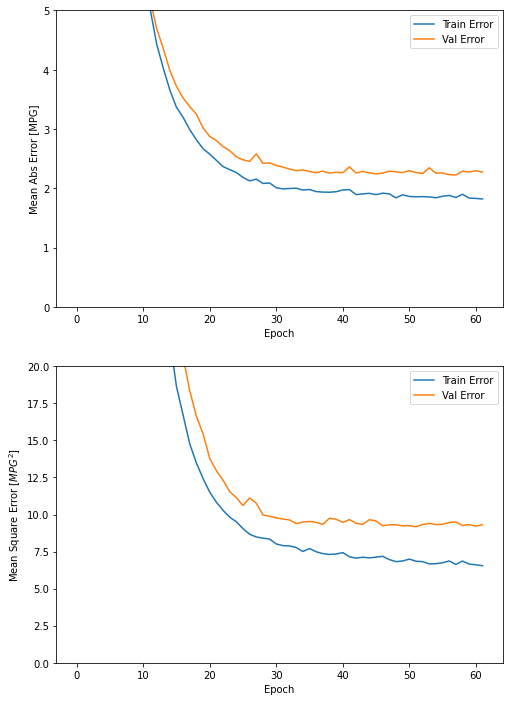

In [77]:
model = build_model()
# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop])

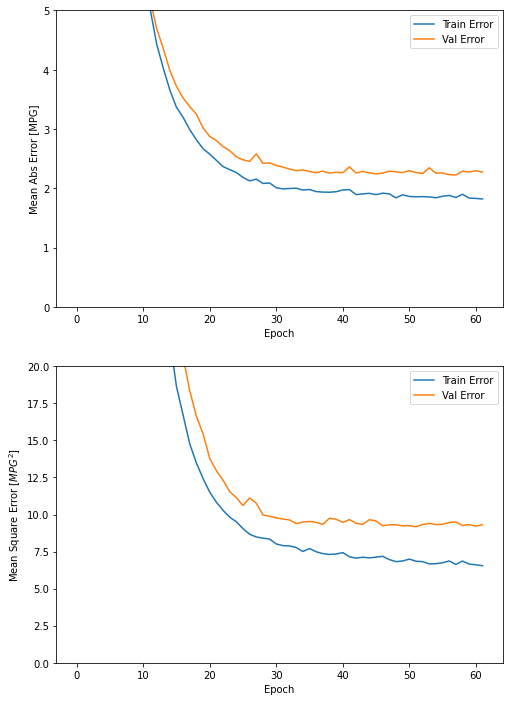

In [78]:
plot_history(history) # 이게 더 좋음

In [79]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.5342 - mae: 1.9954 - mse: 6.5342 - 48ms/epoch - 16ms/step
테스트 세트의 평균 절대 오차:  2.00 MPG
